In [6]:
%load_ext autoreload
%autoreload 2

from propose.datasets.rat7m import Rat7mDataset
from propose.poses.rat7m import Rat7mPose

import propose.datasets.rat7m.transforms as tr

from neuralpredictors.data.transforms import ScaleInputs, ToTensor

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing of the Rat7m dataset
---
## Config parameters

In [7]:
dirname = "/Users/paulpierzchlewicz/PycharmProjects/propose/data/rat7m"  # Choose this such that it points to your dataset
data_key = "s4-d1"

In [18]:
dataset = Rat7mDataset(
    dirname=dirname,
    data_key=data_key,
    transforms=[
        tr.SwitchArmsElbows(),
        tr.CropImageToPose(),
        tr.RotatePoseToCamera(),
        tr.CenterPose(),
        tr.ScalePose(scale=0.03),
        ScaleInputs(scale=0.1, multichannel=True, anti_aliasing=True),
        tr.NormaliseImageScale(),
        tr.ToGraph(),
        ToTensor(),
    ],
)

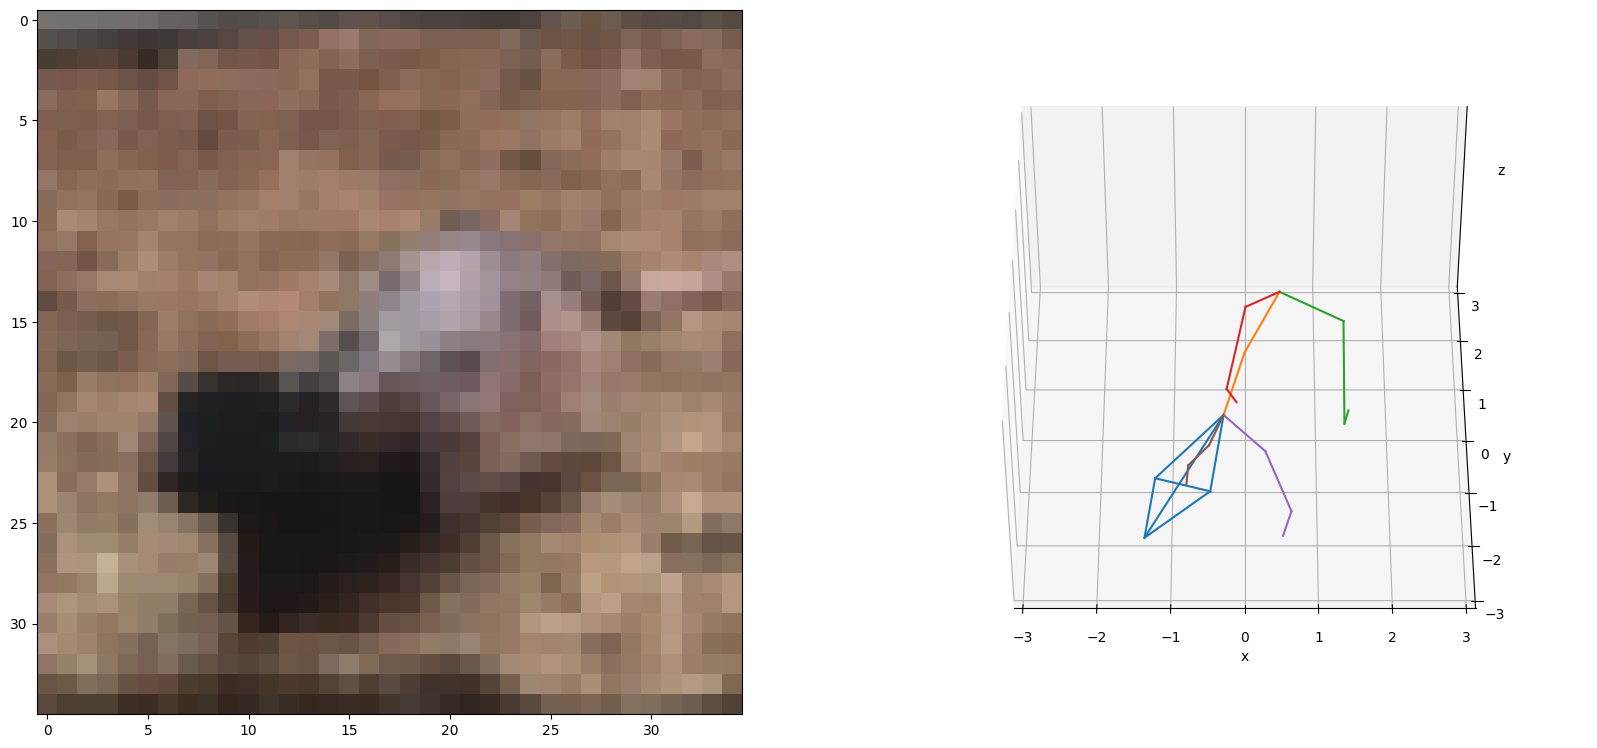

In [19]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

res = dataset[10000]
pose_matrix = res.pose_matrix
adjacency_matrix = res.adjacency_matrix
pose = Rat7mPose(pose_matrix.numpy())
image = res.image

plt.style.use("default")
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)

ax1.imshow(image)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.get_proj = lambda: np.dot(Axes3D.get_proj(ax2), np.diag([1, 1, 0.75, 1]))
ax2.view_init(45, 90)
ax2.set_xlim(3, -3)
ax2.set_ylim(3, -3)
ax2.set_zlim(-1, 1)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_zticks([])

pose.plot(ax=ax2)
plt.show()